#  Salary Prediction Problem

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error, accuracy_score
from sklearn.model_selection import GridSearchCV,KFold
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Open Data using pandas read_csv (df)
df=pd.read_csv('Kaggle_Salary.csv')
df.head(5)

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


In [3]:
df.shape

(15430, 397)

In [4]:
#Gives count of Nan values found in each attribute
df.isnull().sum(axis=0)

Unnamed: 0                                 0
Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
                                       ...  
Q50_Part_6                             14667
Q50_Part_7                             13635
Q50_Part_8                             15037
Q50_OTHER_TEXT                             0
index                                      1
Length: 397, dtype: int64

Renaming required columns and a bit redefining it, For example merging the similar columns and later appending it to df 

In [5]:
df['Gender'] = df['Q1']
df['Age'] = df['Q2']
df['Country'] = df['Q3']
df['Degree'] = df['Q4']
df['Field'] = df['Q5']
df['Role'] = df['Q6']
df['Industry'] = df['Q7']
df['Experience'] = df['Q8']
df['Compensation'] = df['Q9']
df['Softwares'] = df['Q12_MULTIPLE_CHOICE']

#Merging column number 30 to column number 44
df['IDE'] = df[df.columns[30:44]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)
df.update(df['IDE'].fillna('unknown'))

df['Programming Language'] = df['Q17']


df['Recommended Language'] = df['Q18']
df['ML'] = df['Q20']

df['Data Visualization'] = df['Q22']

df['Coding Time'] = df['Q23']
df['Coding Exp'] = df['Q24']
df['ML Exp'] = df['Q25']
df['Data Type'] =df['Q32']

#Merging column number 251 to column number 262
df['Known Data Type'] = df[df.columns[251:262]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)
df['MOOC'] =df['Q32']

#Merging column number 292 to column number 304
df['Known MOOC'] = df[df.columns[292:304]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)
df['Expertise'] =df['Q40']
df['UnfairBias'] =df['Q43']
df['Insights'] =df['Q46']


Above are some of the features that i have selected.

## Data Cleaning and Data Preprocessing

As shown previously, data set with all nan values.
This part contains two stages - 

1) We will clean the data by replacing or removing the null value according to the requirement of that feature. Also to convert it to lowercase. 

2) Convert Categorical Data to Numerical Data.

In [6]:
# df have 1 row with index names , therefore dropping that index row
df.drop(df.head(1).index, inplace=True)
df.head(5)

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Coding Time,Coding Exp,ML Exp,Data Type,Known Data Type,MOOC,Known MOOC,Expertise,UnfairBias,Insights
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,NaN,,NaN,,Independent projects are equally important as ...,NaN,NaN
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,75% to 99% of my time,5-10 years,< 1 year,Time Series Data,"Categorical Data,Numerical Data,Text Data,Time...",Time Series Data,"DataCamp,Udemy",Independent projects are equally important as ...,0-10,10-20
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,75% to 99% of my time,5-10 years,2-3 years,NaN,Categorical Data,NaN,"Udacity,Coursera,edX,DataCamp",Independent projects are slightly more importa...,20-30,20-30
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,25% to 49% of my time,< 1 year,< 1 year,Numerical Data,"Categorical Data,Numerical Data,Text Data",Numerical Data,DataCamp,Independent projects are much more important t...,0-10,0
5,8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,...,75% to 99% of my time,< 1 year,< 1 year,Image Data,"Image Data,Numerical Data,Tabular Data,Text Data",Image Data,"Udacity,Kaggle Learn,Udemy",Independent projects are slightly more importa...,0,10-20


In [7]:
#some methods defined explicitly, for Replacing some data for its easeness.

def primaryTool(softwares):
    primarytool=[]
    for software in softwares:
        software=str(software)
        if software == "Basic statistical software (Microsoft Excel, Google Sheets, etc.)":
            primarytool.append("basic stat software")
        elif software == "Local or hosted development environments (RStudio, JupyterLab, etc.)":
            primarytool.append("development environment")
        elif software == "Advanced statistical software (SPSS, SAS, etc.)":
            primarytool.append("advanced stat software")
        elif software == "Business intelligence software (Salesforce, Tableau, Spotfire, etc.)":
            primarytool.append("business intelligence software")
        elif software == "Cloud-based data software & APIs (AWS, GCP, Azure, etc.)":
            primarytool.append("cloud data software")
        elif software == "Other":
            primarytool.append("other")
        else:
            primarytool.append("unknown")
    return primarytool

def field_convert(fields):
    field=[]
    for value in fields:
        if value == "Engineering (non-computer focused)":
            field.append("engineering")
        elif value == "Computer science (software engineering, etc.)":
            field.append("computer science")
        elif value == "A business discipline (accounting, economics, finance, etc.)":
            field.append("business")
        elif value == "Environmental science or geology":
            field.append("enviornmental science")
        elif value == "I never declared a major":
            field.append("undeclared")
        elif value == "Mathematics or statistics":
            field.append("maths")
        elif value == "Information technology, networking, or system administration":
            field.append("information technology")
        elif value == "Medical or life sciences (biology, chemistry, medicine, etc.)":
            field.append("lif science")
        elif value == "Other":
            field.append("other")
        elif value == "Humanities (history, literature, philosophy, etc.)":
            field.append("humanities")
        elif value == "Physics or astronomy":
            field.append("physics")
        elif value == "Social sciences (anthropology, psychology, sociology, etc.)":
            field.append("social science")
        elif value == "Fine arts or performing arts":
            field.append("arts")
        else:
            field.append("unknown")
    return field

def convert_industry(industries):
    industry=[]
    for value in industries:
        if value == "Computers/Technology":
            industry.append("computers")
        elif value == "I am a student":
            industry.append("student")
        elif value == "Academics/Education":
            industry.append("academics")
        elif value == "Manufacturing/Fabrication":
            industry.append("manufacturing")
        elif value == "Other":
            industry.append("other")
        elif value == "Online Service/Internet-based Services":
            industry.append("online service")
        elif value == "Medical/Pharmaceutical":
            industry.append("medical")
        elif value == "Energy/Mining":
            industry.append("energy")
        elif value == "Retail/Sales":
            industry.append("retail")
        elif value == "Military/Security/Defense":
            industry.append("defense")
        elif value == "Insurance/Risk Assessment":
            industry.append("insurance")
        elif value == "Hospitality/Entertainment/Sports":
            industry.append("entertainment")
        elif value == "Broadcasting/Communications":
            industry.append("communications")
        elif value == "Accounting/Finance":
            industry.append("finance")
        elif value == "Shipping/Transportation":
            industry.append("transportation")
        elif value == "Online Business/Internet-based Sales":
            industry.append("online business")
        elif value == "Government/Public Service":
            industry.append("government")
        elif value == "Non-profit/Service":
            industry.append("service")
        elif value == "Marketing/CRM":
            industry.append("marketing")
        else:
            industry.append("unknown")
    return industry          


In [8]:
'''
#This cell converts to lowercase

#At some it replaces missing data using np.mode that is because, those rows cannot be deleted as it 
contains important data in other feautres. If deleted datset will get concise but not accurate and unprecise output can be obtained.

#It also drops data when required. Dataset whose feature won't matter, are removed

#At some features, values can be filled by its similar feature set given in dataset.
#It converts datatype where required.
'''

df['Gender']=df['Gender'].str.lower()
df['Country']=df['Country'].str.lower()
df['Country']=df.Country.replace({"czech republic": "czech","united states of america": "usa","iran, islamic republic of...": "iran",
                                  "united kingdom of great britain and northern ireland": "britian","hong kong (s.a.r.)": "hong kong","viet nam": "vietnam",
                                 "i do not wish to disclose my location": "unknown","republic of korea": "korea"})
df['Degree']=df['Degree'].replace({"Bachelor’s degree":"bachelor","Master’s degree":"master","Doctoral degree":"doctoral",
                            "Professional degree":"professional","No formal education past high school":"no formal",
                            "Some college/university study without earning a bachelor’s degree":"diploma","I prefer not to answer":"unknown"})

df['Field'] = field_convert(df['Field'])
df['Role']=df['Role'].str.lower()
df['Role']=df['Role'].replace({"product/project manager":"project manager","dba/database engineer":"database manager"})
df['Industry']=convert_industry(df['Industry'])
df['Experience']=df['Experience'].replace({"30 +":"30-35"})
df['Experience'].fillna(df['Experience'].mode()[0],inplace=True)

df['Compensation']=df['Compensation'].astype(float) 
df['Softwares']=primaryTool(df['Softwares'])

df['IDE']=df['IDE'].replace({"Jupyter/IPython":"jupyter","Visual Studio Code":"vscode","Visual Studio":"vstudio",
                          "Notepad++":"np","Sublime Text":"sublime"})
df['IDE']

df['IDE']=df['IDE'].str.lower()

'''
As observed in dataset 'Known Programming language' and 'Programming language' are connected(mapped) to each other.
Therefore, missing values of 'Programming Language' can be filled by values of 'Known Programming Language'.
In dataset, it shows that 'Programming Language' where nan values are present, when we check mapped value of 
'Known Programming Language' we can see that it has only one value.
It can interpreted as in 'Programming Language' those missing values can be actually the default one value present in 
'Known Programming Language'.
'''
#Merging column number 67 to column number 84
df['Known Programming Language'] = df[df.columns[67:84]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)

df['Known Programming Language']=df['Known Programming Language'].replace({"Javascript/Typescript":"js","Visual Basic/VBA":"vba",
                                                                           "C/C++":"c","C#/.NET":"dotnet"})

df['Programming Language'] = np.where(df['Programming Language'].isnull(), 
                                      df['Known Programming Language'], df['Programming Language'])
df['Known Programming Language']=df['Known Programming Language'].str.lower()
df['Programming Language']=df['Programming Language'].str.lower()
df['Programming Language'].fillna(df['Programming Language'].mode()[0],inplace=True)

df['Recommended Language'] = df['Recommended Language'].str.lower()
df['Recommended Language'].fillna(df['Recommended Language'].mode()[0],inplace=True)

#Similar to 'Known Programming lnaguage' and 'Programming language' case
#Merging column number 90 to column number 108
df['Known ML'] = df[df.columns[90:108]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)

df['ML'] = np.where(df['ML'].isnull(), df['Known ML'], df['ML'])
df['ML'].fillna(df['ML'].mode()[0],inplace=True)
df['Known ML']=df['Known ML'].str.lower()
df['ML']=df['ML'].str.lower()

#Similar to 'Known Programming lnaguage' and 'Programming language' case
#Merging column number 112 to column number 124
df['Known Data Visualization'] = df[df.columns[112:124]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)

df['Data Visualization'] = np.where(df['Data Visualization'].isnull(), df['Known Data Visualization'], df['Data Visualization'])
df['Known Data Visualization']=df['Known Data Visualization'].str.lower()
df['Data Visualization']=df['Data Visualization'].str.lower()
df['Data Visualization'].fillna(df['Data Visualization'].mode()[0],inplace=True)

df['Coding Time'].fillna(df['Coding Time'].mode()[0],inplace=True)

df['Coding Exp'].fillna(df['Coding Exp'].mode()[0],inplace=True)

df['ML Exp'].fillna(df['ML Exp'].mode()[0],inplace=True)

#Similar to 'Known Programming lnaguage' and 'Programming language' case
df['Data Type'] = np.where(df['Data Type'].isnull(), df['Known Data Type'], df['Data Type'])
df['Known Data Type']=df['Known Data Type'].str.lower()
df['Data Type']=df['Data Type'].str.lower()

#Similar to 'Known Programming lnaguage' and 'Programming language' case
df['MOOC'] = np.where(df['MOOC'].isnull(), df['Known MOOC'], df['MOOC'])
df['Known MOOC']=df['Known MOOC'].str.lower()
df['MOOC']=df['MOOC'].str.lower()

df['Expertise'] =df['Expertise'].str.lower()
df['Expertise'].fillna(df['Expertise'].mode()[0],inplace=True)

df['UnfairBias'].fillna(df['UnfairBias'].mode()[0],inplace=True)

df['Insights'].fillna(df['Insights'].mode()[0],inplace=True)


Creating a whole new dataset with required data and cleaned dataset

In [9]:
df1=df[['Gender','Age','Country','Degree','Field','Role','Industry','Experience','Softwares',
        'IDE','Programming Language','Recommended Language','ML','Data Visualization','Coding Time','Coding Exp',
        'ML Exp','Data Type','Expertise','Compensation']]
df1.to_csv('sample_salary_dataset.csv')

In [10]:
#To check missing values if present
df1.isnull().sum(axis=0)

Gender                  0
Age                     0
Country                 0
Degree                  0
Field                   0
Role                    0
Industry                0
Experience              0
Softwares               0
IDE                     0
Programming Language    0
Recommended Language    0
ML                      0
Data Visualization      0
Coding Time             0
Coding Exp              0
ML Exp                  0
Data Type               0
Expertise               0
Compensation            0
dtype: int64

Now dataset is cleaned.

In [11]:
df1.columns

Index(['Gender', 'Age', 'Country', 'Degree', 'Field', 'Role', 'Industry',
       'Experience', 'Softwares', 'IDE', 'Programming Language',
       'Recommended Language', 'ML', 'Data Visualization', 'Coding Time',
       'Coding Exp', 'ML Exp', 'Data Type', 'Expertise', 'Compensation'],
      dtype='object')

In [12]:
df1.dtypes

Gender                   object
Age                      object
Country                  object
Degree                   object
Field                    object
Role                     object
Industry                 object
Experience               object
Softwares                object
IDE                      object
Programming Language     object
Recommended Language     object
ML                       object
Data Visualization       object
Coding Time              object
Coding Exp               object
ML Exp                   object
Data Type                object
Expertise                object
Compensation            float64
dtype: object

As the dataset obtained after data cleaning is still huge, therefore we take a subset of datset.

In [13]:
df1['Country'].value_counts()

usa             3393
india           2320
china            870
other            677
russia           581
brazil           557
germany          506
britian          495
canada           441
france           423
japan            412
spain            364
italy            244
australia        234
poland           214
turkey           199
netherlands      193
ukraine          165
mexico           152
unknown          148
singapore        132
nigeria          132
israel           124
sweden           118
switzerland      115
south korea      114
south africa     112
portugal         105
indonesia        103
colombia         101
argentina         99
vietnam           96
pakistan          90
greece            83
denmark           81
malaysia          75
belgium           73
ireland           72
hungary           68
belarus           65
chile             60
iran              55
bangladesh        55
new zealand       55
egypt             55
peru              54
norway            53
kenya        

In [14]:
#I am selecting subset which contains data of Countries 
#only USA and INDIA

df2=df1.query('Country=="usa" or Country=="india"')
df2.head()

,Gender,Age,Country,Degree,Field,Role,Industry,Experience,Softwares,IDE,Programming Language,Recommended Language,ML,Data Visualization,Coding Time,Coding Exp,ML Exp,Data Type,Expertise,Compensation
2,female,30-34,usa,master,computer science,data scientist,student,0-1,development environment,matlab,java,python,none,ggplot2,75% to 99% of my time,5-10 years,< 1 year,time series data,independent projects are equally important as ...,2726.0
3,male,22-24,india,master,maths,data analyst,student,0-1,advanced stat software,rstudio,sql,r,prophet,shiny,75% to 99% of my time,5-10 years,2-3 years,categorical data,independent projects are slightly more importa...,682.0
5,male,18-21,india,master,information technology,other,other,0-1,development environment,"jupyter/ipython,pycharm,atom,visual studio,not...",,python,keras,matplotlib,75% to 99% of my time,< 1 year,< 1 year,image data,independent projects are slightly more importa...,2696.0
7,male,40-44,usa,master,engineering,data scientist,other,5-10,business intelligence software,"matlab,visual studio,notepad++",java,python,scikit-learn,matplotlib,75% to 99% of my time,5-10 years,5-10 years,text data,independent projects are much less important t...,132826.0
9,male,25-29,usa,bachelor,maths,research assistant,academics,1-2,development environment,"jupyter/ipython,rstudio,visual studio code,mat...",python,python,tensorflow,matplotlib,50% to 74% of my time,3-5 years,1-2 years,time series data,independent projects are much more important t...,35826.0


2) Converting Categorical Data to Numeric Data

The data set will contains categorical variables. These variables are typically stored as text values which represent various traits. Many Algoritms doesnot support categorical values. Therfore, LabelEncoder is used. LabelEncoder is StraightForward. 
It also consumes Less disk space by applying weights. One hot encoding is a techique which increaes the dimentionality, so it is used mainly when PCA is to be applied. As here there are few features, so i will not be using PCA. There labelEncoder is used. 

In [15]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

selected_col = ['Gender','Age','Country','Degree','Field','Role','Industry','Experience','Softwares',
        'IDE','Programming Language','Recommended Language','ML','Data Visualization','Coding Time','Coding Exp',
        'ML Exp','Data Type','Expertise']

lb_make.fit(df2[selected_col].values.flatten())

df2[selected_col] = df2[selected_col].apply(lb_make.fit_transform)

df2.head(10)

,Gender,Age,Country,Degree,Field,Role,Industry,Experience,Softwares,IDE,Programming Language,Recommended Language,ML,Data Visualization,Coding Time,Coding Exp,ML Exp,Data Type,Expertise,Compensation
2,0,3,1,3,2,6,17,0,4,1138,7,7,11,6,5,6,7,22,0,2726.0
3,1,1,0,3,8,3,17,0,0,1243,22,8,13,17,5,6,2,4,4,682.0
5,1,0,0,3,6,11,14,0,4,177,0,7,7,9,5,7,7,13,4,2696.0
7,1,5,1,3,3,6,14,10,2,1151,7,7,16,9,5,6,6,21,1,132826.0
9,1,2,1,0,8,14,0,1,4,926,15,7,18,9,4,3,0,22,2,35826.0
14,1,4,1,1,2,11,3,10,2,1107,15,11,16,9,4,1,0,20,0,124197.0
17,1,3,1,0,1,9,8,4,4,518,15,11,16,9,1,3,5,20,4,91621.0
21,1,3,0,0,3,11,14,4,1,521,15,7,7,6,0,9,9,0,4,8865.0
22,0,3,1,3,7,3,2,4,4,24,22,7,11,9,4,3,0,16,3,82046.0
31,1,1,1,0,2,11,18,7,4,975,22,7,7,6,4,0,7,16,4,14650.0


### Exploratory Data Analysis

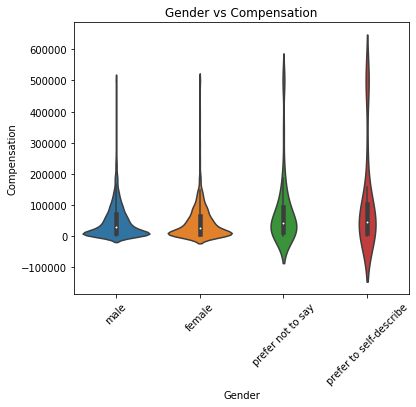

In [16]:
#Exploring Gender vs Salary and impact of gender on salary
ax = plt.figure(figsize=(6,5)) #Intialising the figure with a paticular size
ax = sns.violinplot(x = df1['Gender'] , y = df1.Compensation) #Plotting the figure
ax.set_xticklabels(labels=df1['Gender'].unique() , rotation = 45) #Setting the Xlabels
plt.title('Gender vs Compensation') 
plt.show()

It gives the differnce that can be seen in compensation according to unique count of gender

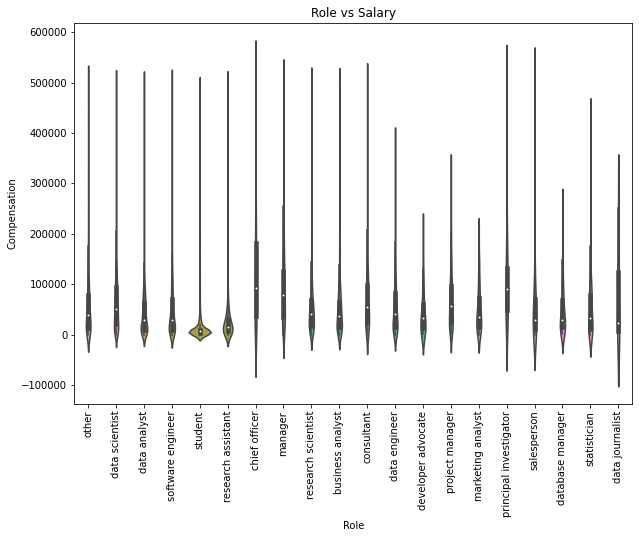

In [17]:
#Exploring the impact of designation on Salary
a = plt.figure(figsize=(10,7))
a = sns.violinplot(x = df1['Role'].dropna() , y = df1.Compensation)
a.set_xticklabels(labels=df1['Role'].dropna().unique() , rotation = 90)
plt.title('Role vs Salary')
plt.show()

A whole lot of differnces can be seen in compensation according to people's roles

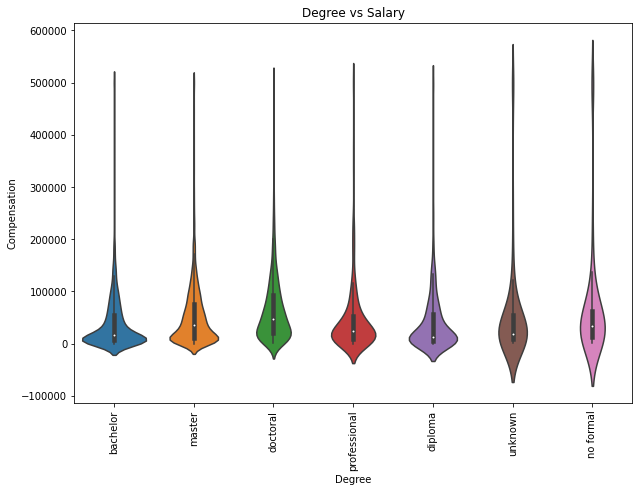

In [18]:
#Exploring the impact of Trending Programming Language on Salary
a = plt.figure(figsize=(10,7))
a = sns.violinplot(x = df1['Degree'].dropna() , y = df1.Compensation)
a.set_xticklabels(labels=df1['Degree'].dropna().unique() , rotation = 90)
plt.title('Degree vs Salary')
plt.show()

Describes variance in compensation according to respective degree obtained

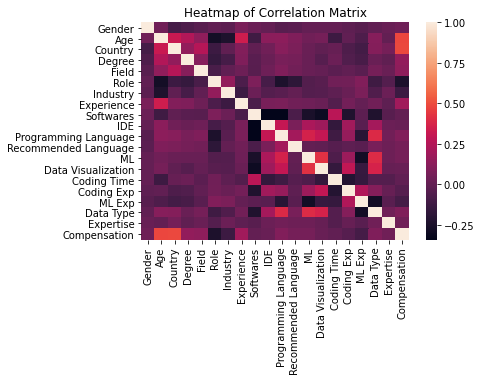

In [19]:
#Correlation Matrix - it plots the realtionship between each selected feature.
import seaborn as sns
corr = df2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.show()


#### Here, as most of the features are categorical, therefore heatmap will not show relation.

### Feature Selection

In [28]:
#set up cross validation
variance = []

def run_kfold(model):
    
    X = X_train
    Y = Y_train
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train1, X_test1 = X.values[train_index], X.values[test_index]
        Y_train1, Y_test1 = Y.values[train_index], Y.values[test_index]
        
        model.fit(X_train1, Y_train1)
        predictions = model.predict(X_test1)
        
        accuracy = r2_score(Y_test1, predictions) # can try mean absolute error instead
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    vari = np.var(outcomes)
    variance.append(vari)
    print("Mean r2: {0}".format(mean_outcome)) 
    print("Standard Deviation: {0}".format(std_outcome)) 
    print("Variance: {0}".format(vari))

#### Why Feature Selection is Important??
Feature engineering is the process of taking a dataset and constructing explanatory variables — features — that can be used to train a machine learning model for a prediction problem. Often, data is spread across multiple tables and must be gathered into a single table with rows containing the observations and features in the columns.

The traditional approach to feature engineering is to build features one at a time using domain knowledge, a tedious, time-consuming, and error-prone process known as manual feature engineering. 

Automated feature engineering improves upon this standard workflow by automatically extracting useful and meaningful features from a set of related data tables with a framework that can be applied to any problem. 

Therefore, Automated feature engineering is more efficient and repeatable than manual feature engineering allowing you to build better predictive models faster.

LinearSVC classifier for feature selection - 

In [29]:
array = df2.values
X = array[:,0:19] 
Y = array[:,19]

In [30]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print('New Shape:',X_new.shape)

New Shape: (5713, 16)


In [31]:
X_new = model.transform(X) #new array with selected feature data
print('New Shape:',X_new.shape)

New Shape: (5713, 16)


In [32]:
df3 = pd.DataFrame(X_new) #Dataframe created of selected features
print(df3.head(10))

     0    1    2     3     4     5    6       7     8     9    10    11   12  \
0  3.0  3.0  2.0   6.0  17.0   0.0  4.0  1138.0   7.0   7.0  11.0   6.0  5.0   
1  1.0  3.0  8.0   3.0  17.0   0.0  0.0  1243.0  22.0   8.0  13.0  17.0  5.0   
2  0.0  3.0  6.0  11.0  14.0   0.0  4.0   177.0   0.0   7.0   7.0   9.0  5.0   
3  5.0  3.0  3.0   6.0  14.0  10.0  2.0  1151.0   7.0   7.0  16.0   9.0  5.0   
4  2.0  0.0  8.0  14.0   0.0   1.0  4.0   926.0  15.0   7.0  18.0   9.0  4.0   
5  4.0  1.0  2.0  11.0   3.0  10.0  2.0  1107.0  15.0  11.0  16.0   9.0  4.0   
6  3.0  0.0  1.0   9.0   8.0   4.0  4.0   518.0  15.0  11.0  16.0   9.0  1.0   
7  3.0  0.0  3.0  11.0  14.0   4.0  1.0   521.0  15.0   7.0   7.0   6.0  0.0   
8  3.0  3.0  7.0   3.0   2.0   4.0  4.0    24.0  22.0   7.0  11.0   9.0  4.0   
9  1.0  0.0  2.0  11.0  18.0   7.0  4.0   975.0  22.0   7.0   7.0   6.0  4.0   

    13   14    15  
0  6.0  7.0  22.0  
1  6.0  2.0   4.0  
2  7.0  7.0  13.0  
3  6.0  6.0  21.0  
4  3.0  0.0  22.0  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,0.246028,0.143078,-0.269339,-0.236844,0.341916,-0.119379,0.126119,0.132350,0.088194,0.040966,0.059474,-0.123536,-0.002006,-0.068670,0.112412
1,0.246028,1.000000,0.112680,-0.152698,-0.091569,0.088439,-0.032267,0.020482,0.069255,0.060204,0.017227,-0.039112,0.025206,-0.054840,-0.087703,0.021497
2,0.143078,0.112680,1.000000,-0.081494,-0.004627,0.033299,-0.036707,0.036739,0.089753,0.050489,0.017756,0.006829,-0.027014,-0.005644,-0.032749,0.059317
3,-0.269339,-0.152698,-0.081494,1.000000,0.154358,-0.070739,0.083566,-0.091984,-0.237409,-0.182059,-0.053313,-0.032891,0.043870,0.047973,0.096391,-0.121626
4,-0.236844,-0.091569,-0.004627,0.154358,1.000000,-0.131938,0.024984,-0.043755,-0.032333,0.001547,-0.046919,-0.042851,-0.015277,0.024496,0.077736,-0.059983
5,0.341916,0.088439,0.033299,-0.070739,-0.131938,1.000000,-0.074772,0.071053,0.072643,0.041265,0.036647,0.020446,-0.051312,0.056115,0.004132,0.047244
6,-0.119379,-0.032267,-0.036707,0.083566,0.024984,-0.074772,1.000000,-0.342091,-0.338406,-0.078232,-0.251742,-0.292241,0.272985,-0.230777,-0.017249,-0.230131
7,0.126119,0.020482,0.036739,-0.091984,-0.043755,0.071053,-0.342091,1.000000,0.307153,0.074970,0.228794,0.184395,-0.162754,0.193844,-0.030663,0.205356
8,0.132350,0.069255,0.089753,-0.237409,-0.032333,0.072643,-0.338406,0.307153,1.000000,0.202299,0.364956,0.306814,-0.119947,0.160198,-0.199973,0.395679
9,0.088194,0.060204,0.050489,-0.182059,0.001547,0.041265,-0.078232,0.074970,0.202299,1.000000,0.003202,-0.010175,-0.038171,-0.013031,-0.028503,0.069557


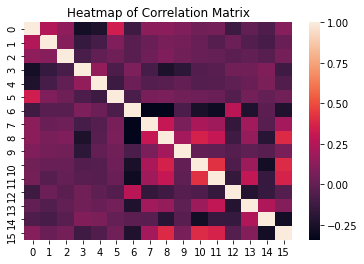

In [33]:
#Correlation Matrix - it plots the realtionship between each selected feature.
import seaborn as sns
corr = df3.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

### Model Preparation

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df3, df2['Compensation'], test_size=0.3)

lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

In [35]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

model_la = LogisticRegression()
#run_kfold (model_la)
Y_pred = model_la.fit(X_train,Y_train)

predictions_lr = model_la.predict(X_test)
#Test_Score = r2_score(predictions, Y_test)
acc_lr = accuracy_score(Y_test, predictions_lr)
print("Logistic Regression accuracy:",acc_lr)

#print ("------------------\n Test Score: " + str(Test_Score))

Logistic Regression accuracy: 0.0005834305717619603


Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. 

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

model = ElasticNet()
run_kfold(model)

scoring = 'accuracy'

predictions = model.predict(X_test)
Test_Score = r2_score(Y_test, predictions)

print ("------------------\n Test Score: " + str(Test_Score))

Fold 1 accuracy: 0.26624301767338
Fold 2 accuracy: 0.2910383914723226
Fold 3 accuracy: 0.24304200465126558
Fold 4 accuracy: 0.32610396610886416
Fold 5 accuracy: 0.2531434593603016
Fold 6 accuracy: 0.26583351037150704
Fold 7 accuracy: 0.2324204774670089
Fold 8 accuracy: 0.2229765582326858
Fold 9 accuracy: 0.23390520810134852
Fold 10 accuracy: 0.26679817210708145
Mean r2: 0.26015047655457657
Standard Deviation: 0.029324050076633825
Variance: 0.0008598999128969283
------------------
 Test Score: 0.24423850341184994


Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#run_kfold(model)
pred = model.fit(X_train, Y_train)
scoring = 'accuracy'
predictions = model.predict(X_test)
Test_Score = r2_score(Y_test, predictions)

print ("------------------\n Test Score: " + str(Test_Score))


------------------
 Test Score: 0.21509449898479616


Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [45]:
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
run_kfold(model)
scoring = 'accuracy'
predictions = model.predict(X_test)
Test_Score = r2_score(Y_test, predictions)

print ("------------------\n Test Score: " + str(Test_Score))

Fold 1 accuracy: 0.2551151684369334
Fold 2 accuracy: 0.27313570431504663
Fold 3 accuracy: 0.19389941849381553
Fold 4 accuracy: 0.34064213195631976
Fold 5 accuracy: 0.2594167535648285
Fold 6 accuracy: 0.24560839177625882
Fold 7 accuracy: 0.20975609769300452
Fold 8 accuracy: 0.17211329601738812
Fold 9 accuracy: 0.2113288907747436
Fold 10 accuracy: 0.24984042933393025
Mean r2: 0.24108562823622695
Standard Deviation: 0.045187817833962265
Variance: 0.002041938880595358
------------------
 Test Score: 0.21616037412857747



| Model | Training set accuracy (%) | Testing set accuracy (%) | Variance |
| --- | --- | --- | --- |
| Ridge | 24.23 | 28.56 | 0.0013 |
| Lasso | 24.24 | 28.56 | 0.0014 |
| Huber Regressor | 21.43 | 25.17 | 0.0012 |
| Gradient Boosting Regressor | 32.94 | 38.30 | 0.0020 |
       

GradientBossting Regressor is found to be the best model.

## Model Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
result = []

In [48]:
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, Y_train)
print(grid)
# summarize the results of the grid search
result.append(grid.best_score_)
print("Best Score:",grid.best_score_)
print("Best Aplha:",grid.best_estimator_.alpha)

predictions = grid.predict(X_test)
Test_Score = r2_score(Y_test, predictions)

print ("------------------\n Test Score: " + str(Test_Score))

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best Score: 0.26508859717022604
Best Aplha: 1.0
------------------
 Test Score: 0.24299691433494242


In [49]:
#prepare a param_grid
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a Huber Regressor model, testing each grid created
model = HuberRegressor()
grid = GridSearchCV(estimator=model, param_grid = dict(alpha=alphas))
grid.fit(X_train, Y_train)
print(grid)
# summarize the results of the grid search
result.append(grid.best_score_)
print("Best Score:",grid.best_score_)
print("Best Estimator:",grid.best_estimator_.alpha)

predictions = grid.predict(X_test)
Test_Score = r2_score(Y_test, predictions)

print ("------------------\n Test Score: " + str(Test_Score))

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=HuberRegressor(alpha=0.0001, epsilon=1.35,
                                      fit_intercept=True, max_iter=100,
                                      tol=1e-05, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best Score: 0.24788331605655914
Best Estimator: 0.0
------------------
 Test Score: 0.21370834553094298


In [50]:
param_grid={'n_estimators':[100], 'learning_rate': [0.1,0.05, 0.02, 0.01]
            ,'max_depth':[4,6]
            , 'min_samples_leaf':[3,5,9,17]
            , 'max_features':[1.0,0.3,0.1]
           } 
# create and fit for the model
model = GradientBoostingRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=4)
grid.fit(X_train, Y_train)
print(grid)
# summarize the results of the grid search
result.append(grid.best_score_)
print("Best Score:",grid.best_score_)
print("Best Estimator:",grid.best_estimator_.n_estimators)

predictions = grid.predict(X_test)
Test_Score = r2_score(Y_test, predictions)

print ("------------------\n Test Score: " + str(Test_Score))

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...
                             

In [51]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit Lasso model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, Y_train)
print(grid)
# summarize the results of the grid search
result.append(grid.best_score_)
print('Best Score:',grid.best_score_)
print('Best Alpha:',grid.best_estimator_.alpha)

predictions = grid.predict(X_test)
Test_Score = r2_score(Y_test, predictions)

print ("------------------\n Test Score: " + str(Test_Score))

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best Score: 0.265088841524642
Best Alpha: 1.0
------------------
 Test Score: 0.24299680089468456


In [52]:
result

[0.26508859717022604,
 0.24788331605655914,
 0.37074540599074074,
 0.265088841524642]

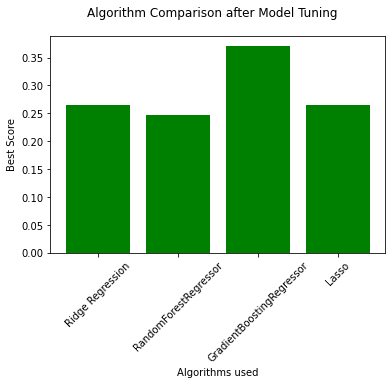

In [55]:
names = ['Ridge Regression','RandomForestRegressor','GradientBoostingRegressor','Lasso']
Perform = len(result)
x = range(Perform)
fig = plt.figure()
fig.suptitle('Algorithm Comparison after Model Tuning')
ax = fig.add_subplot(111)
ax.bar(x, result, color = "green")
plt.xticks(np.arange(4), names)
plt.xticks(rotation = 45)
plt.ylabel('Best Score')
plt.xlabel('Algorithms used')
plt.show()

### Testing and Discussion

<b>Models:</b> Ridge, Lasso, Random Forest Regressor, Gradient Boosting Regressor 

To find the best possible results, the models I have used are 
1)	Ridge
2)	Lasso
3)	Random Forest Regressor
4)	Gradient Boosting Regressor

The above models were chosen as optimization could be performed on the results.
 
All of the above mentioned model was performed in similar method.
1)	Model implementation
2)	Model Optimization- Results obtained based on Hyper Parameter Tunning

Fitting after Model Tuning: 
Ridge is found to be Overfitting
Lasso is found to be overfitting
Huber is found to be Overfitting
GradientBosstingRegressor is found to be overfitting.

Overfitting it may be because, many important features may not be selected.

GradientBosstingRegressor is found to be the best model because it shows highest accuracy among four and with highest variance.

What did you do to increase accuracy?
To increase accuracy, Model Tuning helped.
Still model is found to be less accurate because of random feature selection. If feature selection would be more accurate, acuracy would increase.
